In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("F:/Dhrumil/r/Tableau/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.rename(columns= {"price_per_sqft":"pps"},inplace= True)

In [7]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk', 'pps'], dtype='object')

In [10]:
df.shape

(13200, 7)

In [35]:
df.pps.describe().round()

count       13200.0
mean         7920.0
std        106727.0
min           267.0
25%          4267.0
50%          5438.0
75%          7317.0
max      12000000.0
Name: pps, dtype: float64

In [28]:
P= np.percentile(df.pps,[0.1,99.9])
P

array([ 1366.184, 50959.362])

In [31]:
dfn= df[(df.pps>P[0]) & (df.pps<P[1])]
dfn.shape

(13172, 7)

In [36]:
dfn.pps.describe().round(0)

count    13172.0
mean      6664.0
std       4141.0
min       1379.0
25%       4271.0
50%       5438.0
75%       7311.0
max      50349.0
Name: pps, dtype: float64

In [40]:
ulmt = dfn.pps.mean()+4*dfn.pps.std()
ulmt

23227.73653589432

In [41]:
llmt = dfn.pps.mean()-4*dfn.pps.std()
llmt

-9900.429065502582

In [42]:
dfn2 = dfn[(dfn.pps<ulmt) & (dfn.pps>llmt)]
dfn2.shape

(13047, 7)

In [61]:
dfn2.pps.max()

23214

In [62]:
dfn2.pps.min()

1379

In [66]:
dfn2.pps.mean()

6449.328044761248

In [67]:
dfn2.pps.std()

3487.6700047355785

In [47]:
import scipy.stats
from scipy.stats import norm

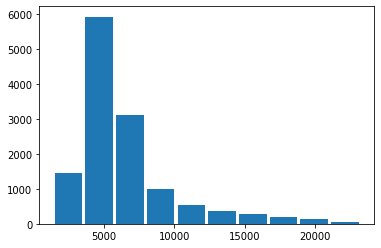

In [77]:
plt.hist(dfn2.pps,rwidth = 0.9);

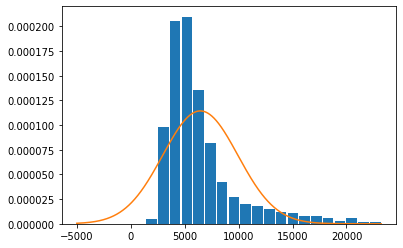

In [79]:
plt.hist(dfn2.pps,bins=20, rwidth = 0.9, density = True)
rng = np.arange(-5000,dfn2.pps.max(), 0.1)
plt.plot(rng,norm.pdf(rng,dfn2.pps.mean(),dfn2.pps.std()))

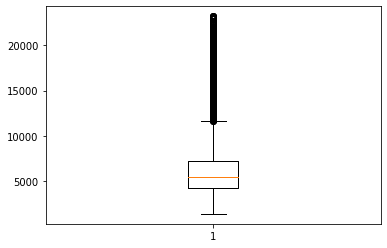

In [44]:
plt.boxplot(dfn2.pps);

In [52]:
dfn['zscore']= (dfn.pps-dfn.pps.mean())/dfn.pps.std()

<ipython-input-52-cda5903b76ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['zscore']= (dfn.pps-dfn.pps.mean())/dfn.pps.std()


In [53]:
dfn.head()

,location,size,total_sqft,bath,price,bhk,pps,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [54]:
dfn[dfn.zscore>4]

,location,size,total_sqft,bath,price,bhk,pps,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [55]:
dfn[dfn.zscore<-4]

,location,size,total_sqft,bath,price,bhk,pps,zscore


In [58]:
dfn[(dfn.zscore<4) & (dfn.zscore>-4)]

,location,size,total_sqft,bath,price,bhk,pps,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967
